In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Conv2D, Flatten, BatchNormalization
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [14]:
label = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [15]:
print(trainX.shape)
print(testX.shape)

(60000, 28, 28)
(10000, 28, 28)


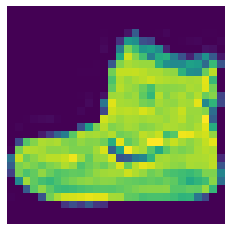

In [16]:
plt.axis('off')
plt.imshow(trainX[0])

In [17]:
new_trainX = np.copy(trainX).astype('float32')/255.0
new_testX = np.copy(testX).astype('float32')/255.0

In [18]:
X_train = new_trainX.reshape((new_trainX.shape[0], 28, 28, 1))
y_train = to_categorical(trainy)

X_test = new_testX.reshape((new_testX.shape[0], 28, 28, 1))
y_test = to_categorical(testy)

In [19]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [20]:
cnn_model = Sequential([
    Conv2D(128,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    #Conv2D(32,(3,3), activation='relu'),
    #MaxPooling2D(2,2),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])

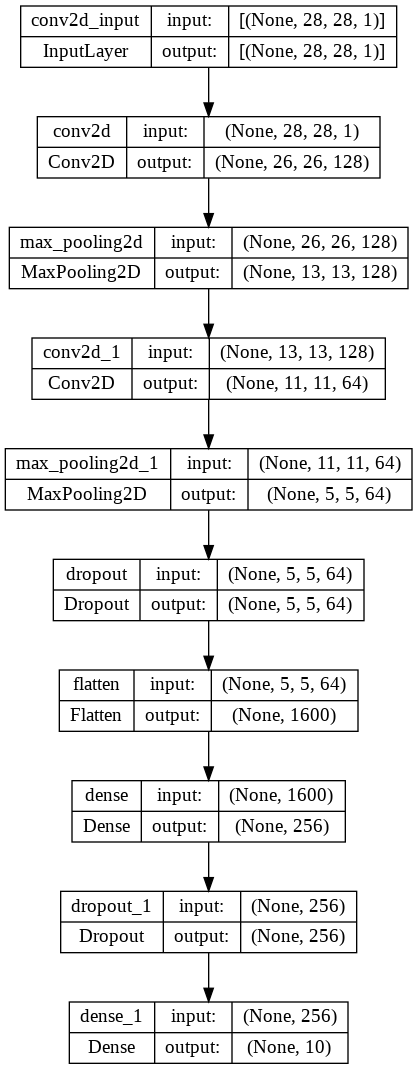

In [21]:
keras.utils.plot_model(cnn_model, show_shapes=True)

In [ ]:
cnn_model.compile(optimizer='adam',
             loss="categorical_crossentropy",
             metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 1600)             

In [ ]:
my_cnn = cnn_model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.5826 - accuracy: 0.7864 - val_loss: 0.3916 - val_accuracy: 0.8572
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3769 - accuracy: 0.8620 - val_loss: 0.3335 - val_accuracy: 0.8802
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.3246 - accuracy: 0.8797 - val_loss: 0.2907 - val_accuracy: 0.8938
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.2914 - accuracy: 0.8940 - val_loss: 0.3141 - val_accuracy: 0.8805
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2721 - accuracy: 0.8980 - val_loss: 0.2611 - val_accuracy: 0.9036
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2521 - accuracy: 0.9065 - val_loss: 0.2472 - val_accuracy: 0.9077
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2336 - accuracy: 0.9124 - val_loss: 0.2378 - val_accuracy: 0.9133

In [ ]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
test_acc= test_acc*100
print("The test accuracy :",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2406 - accuracy: 0.9143
The test accuracy : 91.430002450943


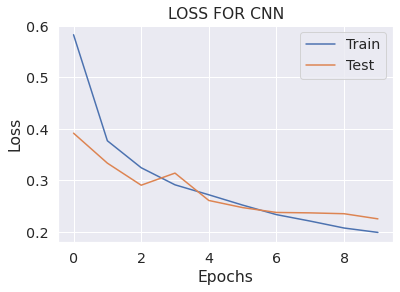

In [ ]:
plt.plot(my_cnn.history['loss'])
plt.plot(my_cnn.history['val_loss'])
plt.title("LOSS FOR CNN")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

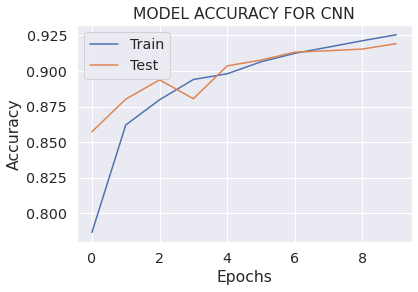

In [ ]:
plt.plot(my_cnn.history['accuracy'])
plt.plot(my_cnn.history['val_accuracy'])
plt.title("MODEL ACCURACY FOR CNN")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
y_predictions = cnn_model.predict(X_test)
y_predictions = (y_predictions > 0.5)

print("CLASSFICATION ANALYSIS")
print(classification_report(y_test, y_predictions))

313/313 [==============================] - 1s 2ms/step
CLASSFICATION ANALYSIS
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.89      0.88      1000
           3       0.93      0.90      0.92      1000
           4       0.90      0.83      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.67      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

   micro avg       0.92      0.91      0.92     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000
 samples avg       0.91      0.91      0.91     10000



[Text(116.5, 0.5, 'Actual Class'), Text(0.5, 80.5, 'Predicted Class')]

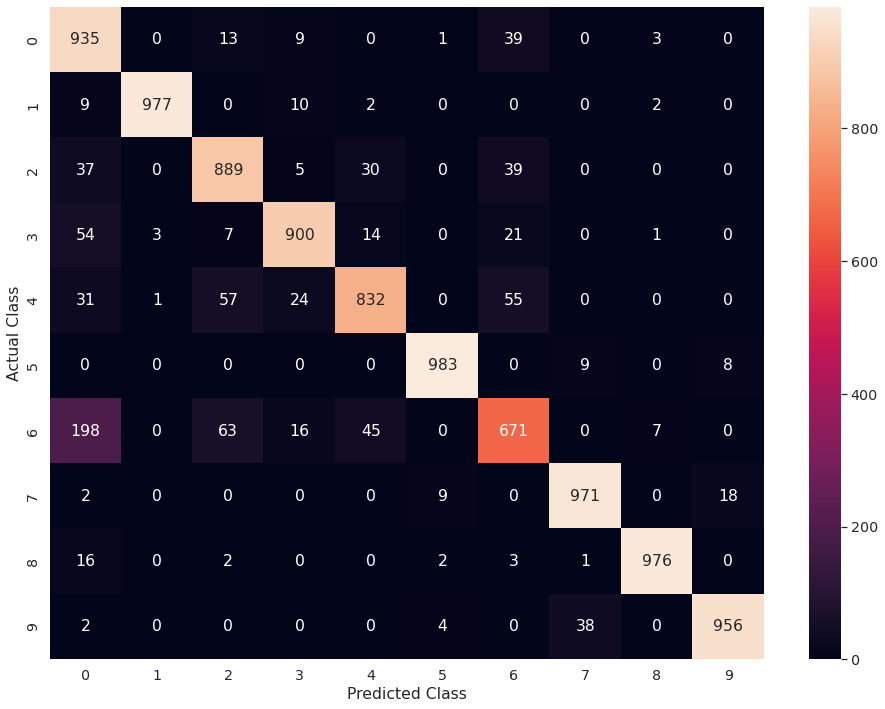

In [ ]:
label_test = []
label_pred = []
for val in y_test:
    label_test.append(np.argmax(val))
for val in y_predictions:
    label_pred.append(np.argmax(val))
conf_mat = confusion_matrix(label_test,label_pred)

sns.set(font_scale=1.3)
fig = plt.figure(figsize=(14,12))
graph = sns.heatmap(conf_mat, annot=True, fmt='d')
graph.set(xlabel='Predicted Class', ylabel='Actual Class')

# **LOGISTIC REGRESSION**

In [18]:
train = pd.read_csv('/content/fashion-mnist_train.csv',low_memory=False)
test = pd.read_csv('/content/fashion-mnist_test.csv', low_memory=False)

In [19]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [20]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#drop label column
X_train= train.drop(['label'],axis = 1)
y_test = test.drop(['label'],axis = 1)
print(y_test.shape)

(10000, 784)


In [23]:
X_test = train['label']
X_test.shape

(60000,)

In [24]:
#converting to float and dividing the data by 255 gives all the data in the range of 0 to 1. 
X_train = X_train.astype('float32')
y_test = y_test.astype('float32')
X_train /= 255.0
y_test /=255.0
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, X_test, test_size=0.1)

In [26]:
pca = PCA(n_components=100, random_state=42)
X_train_pca =pca.fit_transform(X_train)
X_test_pca = pca.transform(X_val)
y_test_pca =pca.transform(y_test)
X_train_PCA1 = pd.DataFrame(X_train_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

In [32]:
logistic = LogisticRegression(max_iter=200, solver='liblinear',penalty='l2')
logistic.fit(X_train_PCA1, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [38]:
y_train_lr = logistic.predict(X_train_PCA1)
y_pred_lr = logistic.predict(X_test_pca)
log_train = metrics.accuracy_score(y_train,y_train_lr )
log_accuracy = metrics.accuracy_score(y_val, y_pred_lr)

print("Train Accuracy score for logisitic Regression is: {}".format(log_train))
print("Test Accuracy score for logistic regression is: {}".format(log_accuracy))


Train Accuracy score for logisitic Regression is: 0.8473888888888889
Test Accuracy score for logistic regression is: 0.8411666666666666


In [35]:
print("----------THE CLASSIFICATION REPORT FOR LOGISTIC REGRESSION IS------------")
print(metrics.classification_report(y_val, y_pred_lr))

----------THE CLASSIFICATION REPORT FOR LOGISTIC REGRESSION IS------------
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       590
           1       0.97      0.97      0.97       585
           2       0.74      0.75      0.74       579
           3       0.79      0.87      0.83       567
           4       0.73      0.73      0.73       596
           5       0.92      0.92      0.92       635
           6       0.67      0.55      0.61       612
           7       0.89      0.91      0.90       630
           8       0.93      0.93      0.93       607
           9       0.94      0.94      0.94       599

    accuracy                           0.84      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000



[Text(98.5, 0.5, 'Actual Class'), Text(0.5, 80.5, 'Predicted Class')]

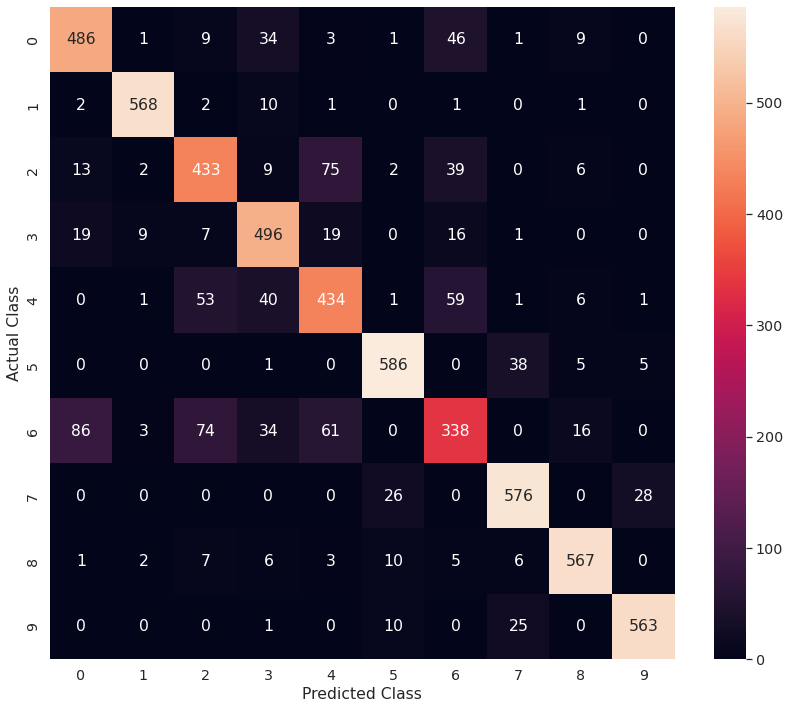

In [36]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_lr, name='Predicted'))
sns.set(font_scale=1.3)
fig = plt.figure(figsize=(14,12))
graph = sns.heatmap(con_matrix, annot=True, fmt='d')
graph.set(xlabel='Predicted Class', ylabel='Actual Class')

# **SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=13,kernel='rbf',gamma="auto",probability = True)
svc.fit(X_train_PCA1, y_train)
y_train_svc = svc.predict(X_train_PCA1)
y_pred_svc = svc.predict(X_test_pca)
a = metrics.accuracy_score(y_val, y_pred_svc)

In [42]:
print("Test Accuracy score for SVC is: {}".format(a))

Test Accuracy score for SVC is: 0.9003333333333333


In [43]:
print(metrics.classification_report(y_val, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       590
           1       0.97      0.97      0.97       585
           2       0.74      0.75      0.74       579
           3       0.79      0.87      0.83       567
           4       0.73      0.73      0.73       596
           5       0.92      0.92      0.92       635
           6       0.67      0.55      0.61       612
           7       0.89      0.91      0.90       630
           8       0.93      0.93      0.93       607
           9       0.94      0.94      0.94       599

    accuracy                           0.84      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000



[Text(98.5, 0.5, 'Actual Class'), Text(0.5, 80.5, 'Predicted Class')]

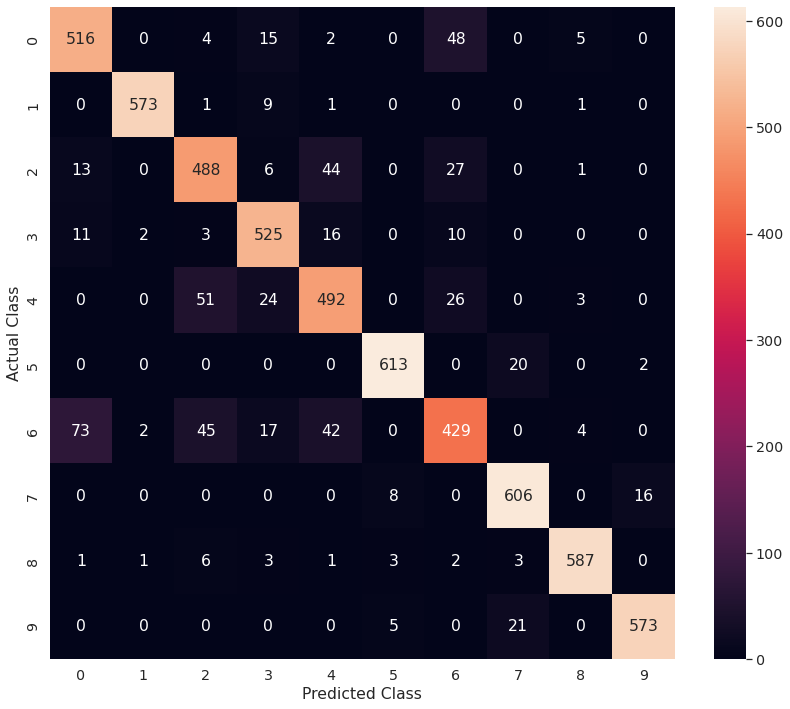

In [44]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_svc, name='Predicted'))
sns.set(font_scale=1.3)
fig = plt.figure(figsize=(14,12))
graph = sns.heatmap(con_matrix, annot=True, fmt='d')
graph.set(xlabel='Predicted Class', ylabel='Actual Class')

# **SVC WITH GAMMA SET TO 'SCALE'**

In [45]:
svc = SVC(C=13,kernel='rbf',gamma="scale",probability = True)
svc.fit(X_train_PCA1, y_train)
y_train_svc = svc.predict(X_train_PCA1)
y_pred_svc = svc.predict(X_test_pca)
a = metrics.accuracy_score(y_val, y_pred_svc)

In [46]:
print("Test Accuracy score for SVC is: {}".format(a))

Test Accuracy score for SVC is: 0.9058333333333334


In [47]:
print(metrics.classification_report(y_val, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       590
           1       0.97      0.97      0.97       585
           2       0.74      0.75      0.74       579
           3       0.79      0.87      0.83       567
           4       0.73      0.73      0.73       596
           5       0.92      0.92      0.92       635
           6       0.67      0.55      0.61       612
           7       0.89      0.91      0.90       630
           8       0.93      0.93      0.93       607
           9       0.94      0.94      0.94       599

    accuracy                           0.84      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000



[Text(98.5, 0.5, 'Actual Class'), Text(0.5, 80.5, 'Predicted Class')]

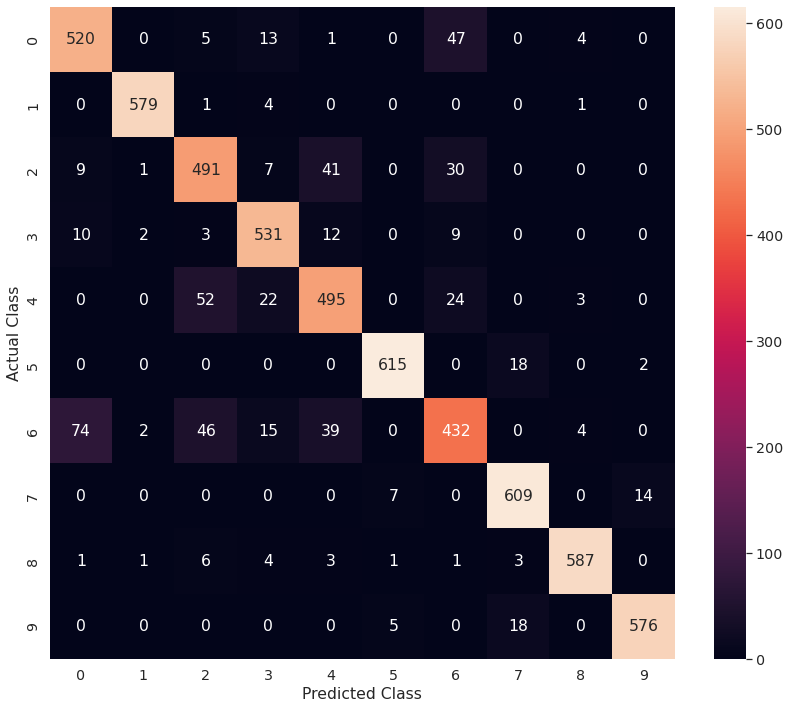

In [48]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_svc, name='Predicted'))
sns.set(font_scale=1.3)
fig = plt.figure(figsize=(14,12))
graph = sns.heatmap(con_matrix, annot=True, fmt='d')
graph.set(xlabel='Predicted Class', ylabel='Actual Class')

# **KNN**

In [22]:
traindata = pd.read_csv("fashion-mnist_train.csv")
testdata = pd.read_csv("fashion-mnist_test.csv")

In [23]:
data_train=traindata.iloc[:,1:785]/ 255.0
label_train=pd.DataFrame([traindata.iloc[:,0]]).T
data_test=testdata.iloc[:,0:784]/ 255.0

In [24]:
label_train.value_counts()

label
0        6000
1        6000
2        6000
3        6000
4        6000
5        6000
6        6000
7        6000
8        6000
9        6000
dtype: int64

In [25]:
categoryMap=
{0 :'T-shirt/Top',
1 :'Trouser',
2 :'Pullover',
3 :'Dress',
4 :'Coat',
5 :'Sandal',
6 :'Shirt',
7 :'Sneaker',
8 :'Bag',
9 :'Ankle boot'}

label_train['category']=label_train['label'].map(categoryMap)

In [26]:
l_train=pd.DataFrame([traindata.iloc[:,0]]).T
X_train, X_val, Y_train, Y_val = train_test_split(data_train, l_train, test_size = 0.25, random_state=255)

In [27]:
np.mean(X_train.values),np.std(X_train.values),np.mean(X_val.values),np.std(X_val.values)

(0.28573853674803273,
 0.3525878811647684,
 0.2872052621048414,
 0.35347813709187687)

In [31]:
X_train=StandardScaler().fit_transform(X_train)
X_val=StandardScaler().fit_transform(X_val)
np.mean(X_train),np.std(X_train),np.mean(X_val),np.std(X_val)

(-7.554551592506054e-19,
 1.0000000000000002,
 -1.4778805541404805e-18,
 0.9999999999999989)

In [32]:
column_name=['pixel'+str(i) for i in range(1,785)]
X_train = pd.DataFrame(X_train,columns =column_name)
X_val = pd.DataFrame(X_val,columns =column_name)

In [33]:
pca = PCA(n_components=0.9,copy=True, whiten=False)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
print(pca.explained_variance_ratio_)

[0.22021041 0.14384998 0.0547689  0.05131468 0.04063138 0.03007163
 0.02747667 0.02328081 0.016965   0.01312661 0.01167599 0.00966141
 0.00899778 0.00863649 0.00742566 0.0073279  0.0065662  0.00632188
 0.00623672 0.00579956 0.00518253 0.0051314  0.00473594 0.00455951
 0.00437728 0.00416881 0.00393644 0.00392189 0.00382522 0.0037333
 0.00371573 0.00351303 0.00336553 0.00328974 0.00328232 0.00319012
 0.0030556  0.00294426 0.0028811  0.00282458 0.0027157  0.00266539
 0.00258201 0.00254747 0.00247826 0.00245517 0.0023832  0.00227583
 0.00224023 0.0021398  0.00210534 0.00209826 0.00202363 0.00201152
 0.00197738 0.00195216 0.00191349 0.00184274 0.00183835 0.00179505
 0.00176205 0.00174474 0.00172148 0.00168596 0.00162911 0.00157656
 0.00155699 0.00151357 0.00148351 0.00147275 0.00144672 0.00144151
 0.00142568 0.00141295 0.00137972 0.00136985 0.00134535 0.00130561
 0.00129231 0.00126802 0.0012613  0.00123772 0.00121467 0.00119871
 0.00117982 0.00115049 0.00114735 0.00112809 0.00111563 0.00110

In [35]:
pcn=X_train.shape[1]
pcn

136

In [36]:
X_train = pd.DataFrame(X_train,columns =column_name[0:pcn])
X_val = pd.DataFrame(X_val,columns =column_name[0:pcn])

In [39]:
k = 6
cross_val = KFold(k, shuffle=True, random_state=1)
fold_count = 1

# For training epochs
epochs = 32

# For loss & acc plotting
histories = []

# For testing/evaluation acc scores
eval_scores = []

# For callbacks
es_callbacks = keras.callbacks.EarlyStopping(monitor="val_loss",
                                          mode="min",
                                          verbose=1,
                                          patience=4)

In [40]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, Y_train.values.ravel())
y_train_prd = knn.predict(X_train)
y_val_prd = knn.predict(X_val)
acc_train_knn=accuracy_score(Y_train,y_train_prd )
acc_val_knn=accuracy_score(Y_val,y_val_prd)
print("accuracy on train set:{:.4f}\naccuracy on validation set:{:.4f}".format(acc_train_knn,acc_val_knn))

accuracy on train set:0.8908
accuracy on validation set:0.8566


In [45]:
print("--------------THE CLASSFICATION REPORT FOR KNN---------------")
print(metrics.classification_report(Y_val, y_val_prd))

--------------THE CLASSFICATION REPORT FOR KNN---------------
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1493
           1       0.99      0.97      0.98      1463
           2       0.74      0.78      0.76      1449
           3       0.89      0.89      0.89      1500
           4       0.75      0.77      0.76      1527
           5       0.98      0.90      0.93      1442
           6       0.69      0.57      0.62      1538
           7       0.90      0.94      0.92      1518
           8       0.98      0.93      0.95      1544
           9       0.92      0.96      0.94      1526

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



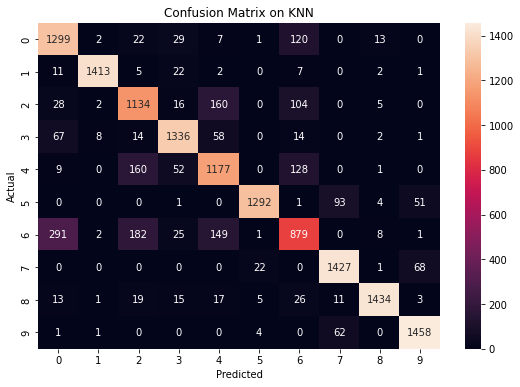

In [46]:
con_matrix = pd.crosstab(pd.Series(Y_val.values.flatten(), name='Actual' ),pd.Series(y_val_prd, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on KNN")
sns.heatmap(con_matrix, annot=True, fmt='g')
plt.show()

# **NAIVE BAYES**

In [50]:
NB = GaussianNB()
NB.fit(X_train, Y_train.values.ravel())
y_train_prd = NB.predict(X_train)
y_val_prd = NB.predict(X_val)
acc_train_nb=accuracy_score(Y_train,y_train_prd )
acc_val_nb=accuracy_score(Y_val,y_val_prd)
print("accuracy on train set:{:.4f}\naccuracy on validation set:{:.4f}".format(acc_train_nb, acc_val_nb))

accuracy on train set:0.6654
accuracy on validation set:0.6655


In [51]:
y_pred = NB.predict(X_val)
y_pred

array([0, 4, 8, ..., 7, 0, 7])

In [55]:
print("--------------CLASSIFICATION REPORT OF NAIVE BAYES-----------------")
print(metrics.classification_report(Y_val, y_pred))

--------------CLASSIFICATION REPORT OF NAIVE BAYES-----------------
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1493
           1       0.98      0.92      0.95      1463
           2       0.66      0.56      0.61      1449
           3       0.69      0.87      0.77      1500
           4       0.48      0.79      0.60      1527
           5       0.76      0.54      0.63      1442
           6       0.28      0.16      0.20      1538
           7       0.65      0.89      0.75      1518
           8       0.57      0.62      0.59      1544
           9       0.89      0.63      0.73      1526

    accuracy                           0.67     15000
   macro avg       0.68      0.67      0.66     15000
weighted avg       0.67      0.67      0.66     15000



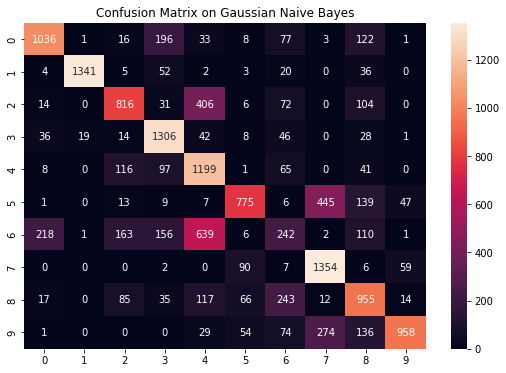

In [53]:
con_matrix = pd.crosstab(pd.Series(Y_val.values.flatten(), name='Actual' ),pd.Series(y_val_prd, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Gaussian Naive Bayes")
cm = confusion_matrix(Y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

# **DECISION TREE**

In [65]:
X_test = testdata.drop(['label'], axis = 1)
y_test = testdata.label
X = traindata.drop(['label'], axis = 1)
y = traindata.label

In [66]:
parameters = {'max_depth' : [13,16,19]}

In [67]:
tree_clf = DecisionTreeClassifier()
grid_search_cv_clf_tree = GridSearchCV(tree_clf, parameters, cv = 5)
grid_search_cv_clf_tree.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [13, 16, 19]})

In [68]:
y_pred=grid_search_cv_clf_tree.predict(X_test)

In [70]:
print("----------CLASSFICATION REPORT OF DECISION TREE----------")
print(metrics.classification_report(y_test, y_pred))

----------CLASSFICATION REPORT OF DECISION TREE----------
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1000
           1       0.97      0.96      0.96      1000
           2       0.72      0.69      0.70      1000
           3       0.87      0.83      0.85      1000
           4       0.67      0.77      0.72      1000
           5       0.92      0.88      0.90      1000
           6       0.59      0.56      0.57      1000
           7       0.88      0.89      0.89      1000
           8       0.93      0.92      0.92      1000
           9       0.90      0.91      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



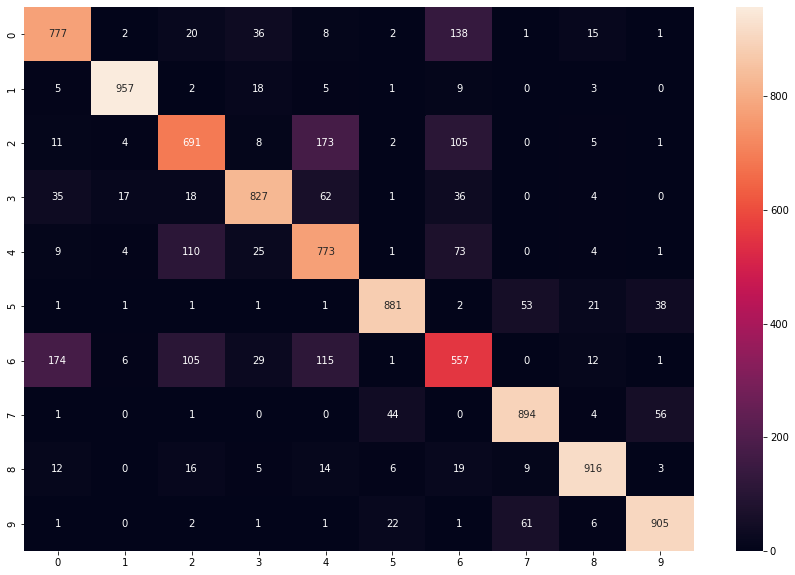

In [74]:
cm_tree=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm_tree, annot=True, fmt='g')

In [75]:
best_clf_tree = grid_search_cv_clf_tree.best_estimator_

In [86]:
a= best_clf_tree.score(X_test,y_test)*100
print("The accuracy for Decision tree is:{:.2f} ".format(a))

The accuracy for Decision tree is:81.78 


# **RANDOM FOREST**

In [94]:
clf_rf = RandomForestClassifier()

In [95]:
clf_rf.fit(X,y)

RandomForestClassifier()

In [96]:
b= clf_rf.score(X_test,y_test)*100
print("The accuracy for Random Forest is: {:.2f} ".format(b))

The accuracy for Random Forest is: 88.29 


In [97]:
parameters = {'n_estimators':[30, 60, 90], 
             'max_depth': [9, 15, 22]}

In [99]:
grid_search_cv_clf_rf = GridSearchCV(clf_rf, parameters, cv = 4)

In [100]:
grid_search_cv_clf_rf.fit(X, y) 

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 15, 22],
                         'n_estimators': [30, 60, 90]})

In [101]:
y_pred_rf=grid_search_cv_clf_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.81      0.80      1000
           3       0.90      0.93      0.91      1000
           4       0.80      0.86      0.83      1000
           5       0.98      0.95      0.96      1000
           6       0.75      0.60      0.67      1000
           7       0.92      0.93      0.93      1000
           8       0.96      0.98      0.97      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



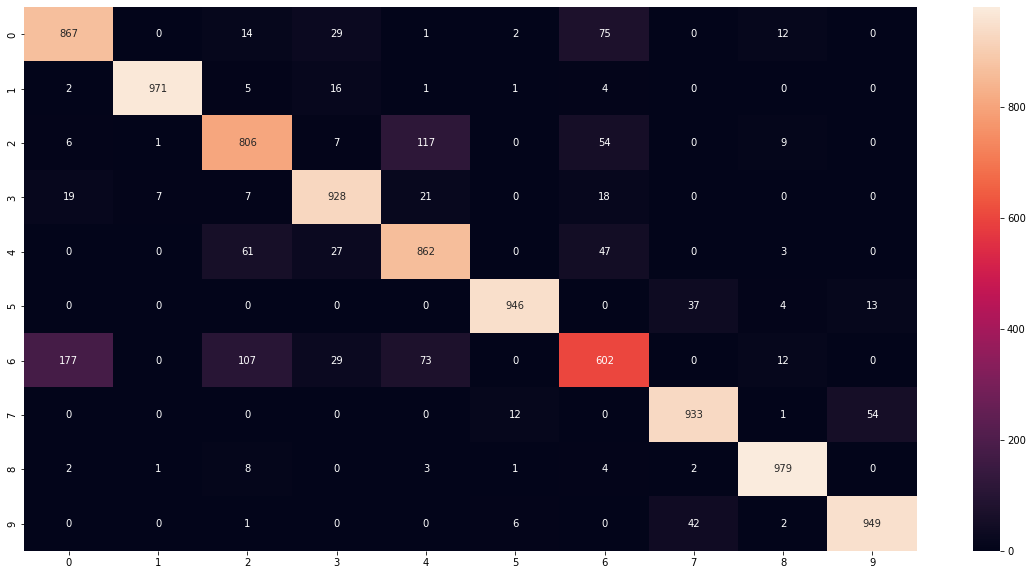

In [102]:
cm=confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True,fmt='g')

In [104]:
best_clf_rf = grid_search_cv_clf_rf.best_estimator_
b=best_clf_rf.score(X_test,y_test)*100
print("The accuracy for Random Forest is: {:.2f} ".format(b))

The accuracy for Random Forest is: 88.43 
